In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25, random_state=2)

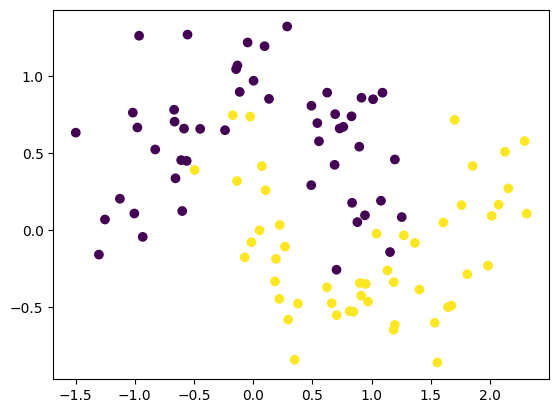

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#### Vanilla Model

In [4]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',
               optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 6s 602us/step


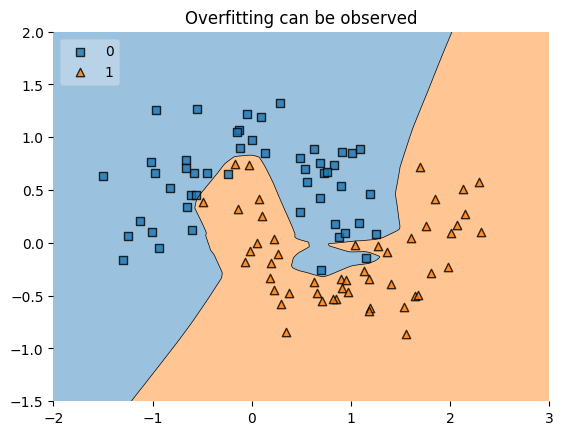

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('Overfitting can be observed') 
plt.show()

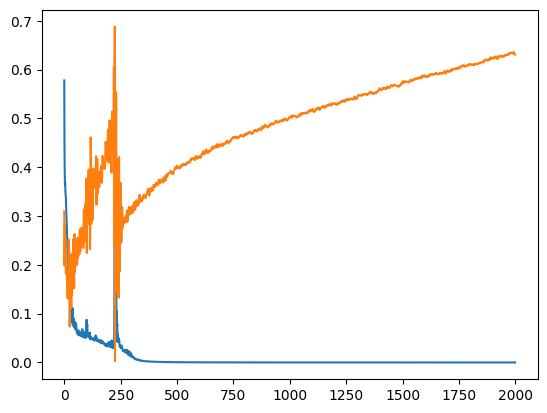

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

#### Model with L2 Regularized weights

In [8]:
model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation="relu",
           kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",
           kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',
               optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 6s 662us/step


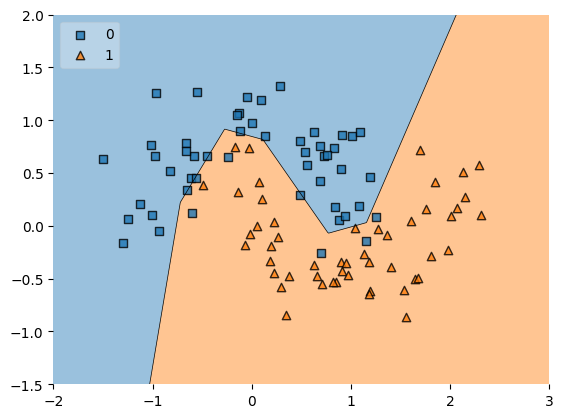

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

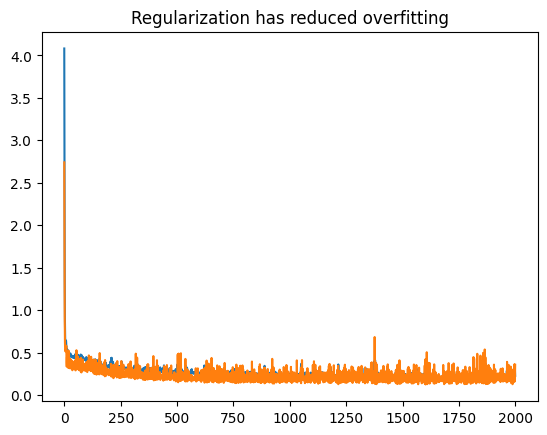

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Regularization has reduced overfitting')
plt.show()

#### Plotting the weights for both models
 - We can clearly see the difference in range of weights for  both the models

In [12]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

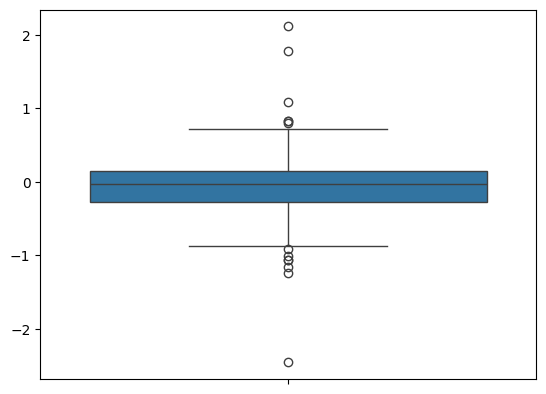

In [13]:
sns.boxplot(model1_weight_layer1)

<Axes: >

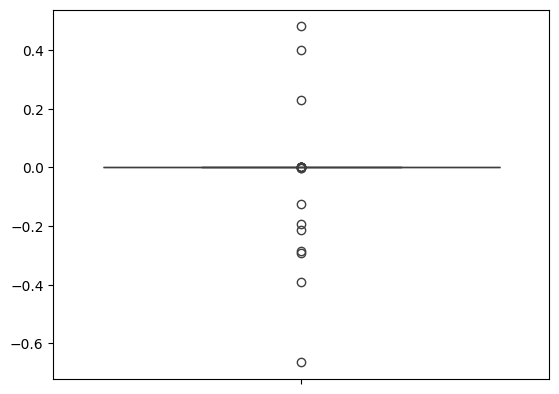

In [14]:
sns.boxplot(model2_weight_layer1)

In [15]:
model1_weight_layer1.min()

-2.4544823

In [16]:
model2_weight_layer1.min()

-0.6655216

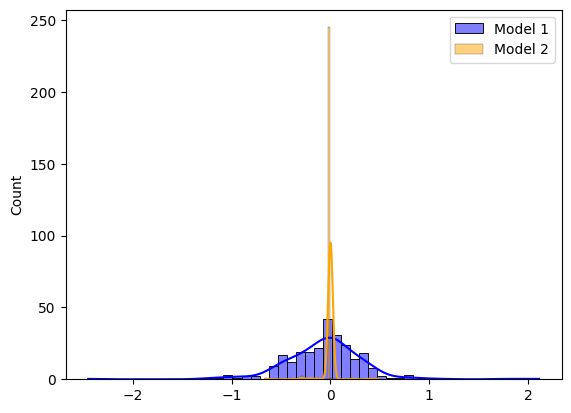

In [17]:
sns.histplot(model1_weight_layer1, kde=True, color="blue", label="Model 1", bins=50,)
sns.histplot(model2_weight_layer1, kde=True, color="orange", label="Model 2", bins=50,)
plt.legend()
plt.show()

In [18]:
model1.get_weights()[0].reshape(256)

array([-4.57020879e-01, -1.49527565e-01, -6.85504079e-02,  3.30481261e-01,
       -3.66525203e-01, -4.19599563e-01, -2.30068132e-01, -9.93334688e-03,
       -2.52651334e-01, -3.63613278e-01, -2.63586640e-01,  2.66654521e-01,
       -3.56634855e-02,  7.94147134e-01,  3.57828647e-01,  1.34470640e-02,
       -5.24906158e-01,  2.07266539e-01,  4.53309268e-01, -7.01533481e-02,
        1.11878470e-01,  3.75399172e-01, -3.92715111e-02, -6.33790949e-03,
       -5.08952379e-01, -6.14181459e-02, -4.68557715e-01, -1.87704399e-01,
       -2.39801645e-01, -4.35729772e-02, -5.59951186e-01, -3.41833144e-01,
        2.37414637e-03, -1.73174832e-02,  1.49336904e-01, -8.55177864e-02,
       -6.02407932e-01, -2.44918197e-01, -2.03932300e-01,  4.62393820e-01,
        3.60564917e-01,  5.22751780e-03, -2.01581314e-01, -5.91278017e-01,
        3.66119444e-01,  8.28670204e-01,  1.38078943e-01, -4.98256460e-02,
       -5.04633844e-01, -1.81409791e-01, -1.71566993e-01,  3.47811341e-01,
       -2.25348435e-02,  